In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#上面是导入需要用到的库

In [3]:
data=pd.read_csv("fake_job_postings_train.csv")#打开训练数据集
test=pd.read_csv("fake_job_postings_test.csv")#打开测试数据集
data.head()
test.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,8f154fcd1e9b4519ae705957e47bf8f5,Marketing / Sales Executives,"IN, KA, Bangalore",Marketing,NaN,Who are we?Creators Lab (aka #URL_285fcfb70c84...,Who are we looking for: Marketing / Sales Exec...,Education and ExperienceA college degree or eq...,Work With Us and GetResponsibility: What you d...,0,1,1,Full-time,Not Applicable,Bachelor's Degree,Information Technology and Services,Marketing
1,8f15fe4c47c846cfa6ccb2ea1fd54102,I want to work at Vend in AUCKLAND,"NZ, N, Auckland",All,NaN,Vend is looking for some awesome new talent to...,No suitable jobs right now on our jobs page? ...,Are you enthusiastic about the retail industry...,When you work at Vend you can expect the follo...,0,1,1,NaN,NaN,NaN,NaN,NaN
2,8f1978db679f40448dc6ef3bb1747434,Mechanical Engineer,"NG, LA, lagos",Admin,NaN,NaN,Qualifications and Requirements:The ideal cand...,Qualifications and Requirements:The ideal cand...,Qualifications and Requirements:The ideal cand...,0,1,0,Full-time,Director,Master's Degree,Airlines/Aviation,Engineering
3,8f22bb4c9c524034a1f01b96ac98d7be,M16 9HQ Warehousing Apprenticeship Under NAS 1...,"GB, MAN, Old Trafford",NaN,NaN,Established on the principles that full time e...,This is fantastic opportunity for someone want...,Government funding is only available for 16-18...,Future Prospects,0,1,0,Full-time,Internship,High School or equivalent,Warehousing,NaN
4,8f24bad7d85e45698c3369c178265a17,Embedded and Application Engineer,"NZ, N, Auckland",Engineering,NaN,Want to be part of a NZ success story that’s g...,We are #URL_f33bebd1256d2e62399cf4a277a4a8731d...,As an expert in Embedded Development you will ...,"We are in an exciting growth phase, if you wou...",0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Engineering


C:\Users\lwb13\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


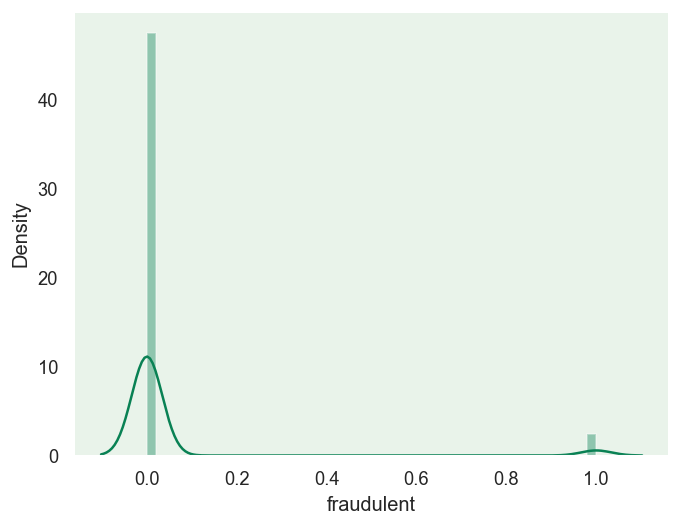

In [4]:
plt.figure(dpi=120)
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})#修改背景色
g=sns.distplot(data['fraudulent'],hist=True,#默认绘制直方图，详细参考plt.hist
               kde=True,color="#098154")

In [5]:
plt.show()
print(data['fraudulent'].value_counts())#fraudulen取值分布

0    9514
1     485
Name: fraudulent, dtype: int64


In [6]:
data.info()#data数据信息
test.info()#test数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               9999 non-null   object
 1   title                9999 non-null   object
 2   location             9801 non-null   object
 3   department           3611 non-null   object
 4   salary_range         1606 non-null   object
 5   company_profile      8114 non-null   object
 6   description          9999 non-null   object
 7   requirements         8434 non-null   object
 8   benefits             5917 non-null   object
 9   telecommuting        9999 non-null   int64 
 10  has_company_logo     9999 non-null   int64 
 11  has_questions        9999 non-null   int64 
 12  employment_type      8007 non-null   object
 13  required_experience  6039 non-null   object
 14  required_education   5451 non-null   object
 15  industry             7218 non-null   object
 16  functi

In [7]:
data.describe()#data数据描述统计，包括总数目，均值、标准差，最小值，最大值，四分位数
test.describe()#test数据描述统计，包括总数目，均值、标准差，最小值，最大值，四分位数

,telecommuting,has_company_logo,has_questions
count,7881.000000,7881.000000,7881.000000
mean,0.043649,0.795838,0.490166
std,0.204327,0.403113,0.499935
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [8]:
data.isna().sum()#data各列缺失值统计
test.isna().sum()#test各列缺失值统计

job_id                    0
title                     0
location                148
department             5159
salary_range           6619
company_profile        1423
description               1
requirements           1130
benefits               3128
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1479
required_experience    3090
required_education     3557
industry               2122
function               2801
dtype: int64

In [9]:
bin_features = ['telecommuting', 'has_company_logo', 'has_questions']#二值变量
cat_features = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']#多分类变量
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']#文本特征变量
complex_features = ['location', 'salary_range']#复杂变量

In [10]:
data.drop('job_id', axis=1, inplace=True)#删掉job_id变量，改变了原数据
test.drop('job_id', axis=1, inplace=True)#删掉job_id变量，改变了原数据

In [11]:
#把data中的文本变量转换为二值变量
for feature_name in text_features[1:]:
    unspec_feature_name = f'{feature_name}_specified'
    data[unspec_feature_name] = (~data[feature_name].isna()).astype('int')
    bin_features += [unspec_feature_name]
#把test中的文本变量转换为二值变量
for feature_name in text_features[1:]:
    unspec_feature_name = f'{feature_name}_specified'
    test[unspec_feature_name] = (~test[feature_name].isna()).astype('int')

In [12]:
bin_features

['telecommuting',
 'has_company_logo',
 'has_questions',
 'company_profile_specified',
 'description_specified',
 'requirements_specified',
 'benefits_specified']

In [13]:
data.head()[text_features]

,title,company_profile,description,requirements,benefits
0,Office Manager / HR,NaN,"Based in the heart of the City, this exception...",You will have previous experience in running a...,Excellent Salaries Company Benefit PackagesInt...
1,Director of Account Management,NaN,The Director of Account Management brings stro...,8+ years experience in an account management a...,NaN
2,Brand Manager [Contract position],Since 1978Our goal has been to create engaging...,Drake Cooper Brand Managers help clients grow ...,Education: BS/BA degree in advertising / mar...,ABOUT DRAKE COOPERWe are a Northwest U.S. adve...
3,Web Developer,We are a technology focused company with an es...,This position is for a talented PHP/MYSQL/JQue...,"Solid object-oriented design, programming, and...",NaN
4,Performance Improvement Director,NaN,Oversees implementation and operation of Perfo...,Quality-oriented consulting company with a foc...,Full-time position.Quality benefits package of...


In [14]:
for feature_name in text_features[1:]:
    test[feature_name].fillna('', inplace=True)
for feature_name in text_features[1:]:
    data[feature_name].fillna('', inplace=True)

In [15]:
#加载nltk库
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
languages = ['english']

In [16]:
stop_words = set(stopwords.words(languages))

In [17]:
location = data['location'].copy()#获取data中location字段的值
print(location.head(15))#显示location前15行的值

0                    GB, LND, 
1        US, CA, San Francisco
2                  US, , Boise
3                       GR, , 
4                       US, , 
5     US, CA, Huntington beach
6       US, VA, Virginia Beach
7                US, ND, Fargo
8                  EG, C, Maad
9              US, IL, Chicago
10              VI, , Multiple
11             US, IL, Chicago
12            ES, VC, Valencia
13          GB, ESS, Brentwood
14              US, CO, Denver
Name: location, dtype: object


In [18]:
location_test = test['location'].copy()#获取test中location字段的值
location_test.head(15)#显示location前15行的值

0         IN, KA, Bangalore
1           NZ, N, Auckland
2             NG, LA, lagos
3     GB, MAN, Old Trafford
4          NZ, N, Auckland 
5     US, NY, New York City
6                    NZ, , 
7                 GB, LND, 
8           CA, ON, London 
9       GB, BIR, Birmingham
10            US, TX, Plano
11           US, TX, Austin
12                      NaN
13          GB, LND, London
14           US, NC, Durham
Name: location, dtype: object

In [19]:
location_splitted = list(location.str.split(', ').values)#location按,进行分割成list结构
location_splitted_test = list(location_test.str.split(', ').values)#location按,进行分割成list结构

In [20]:
#处理location_splitted,如果没值，就设置为Unpecified
for loc_ind, loc in enumerate(location_splitted):
    if loc is np.nan:
        location_splitted[loc_ind] = ['Unpecified'] * 3
    else:
        for el_ind, el in enumerate(loc):
            if el == '':
                loc[el_ind] = 'Unpecified'

In [21]:
#处理location_splitted_test,如果没值，就设置为Unpecified
for loc_ind, loc in enumerate(location_splitted_test):
    if loc is np.nan:
        location_splitted_test[loc_ind] = ['Unpecified'] * 3
    else:
        for el_ind, el in enumerate(loc):
            if el == '':
                loc[el_ind] = 'Unpecified'

In [22]:
location_splitted = list(map(lambda loc: list(loc), location_splitted))#location按,进行分割成list结构
location_splitted_test = list(map(lambda loc: list(loc), location_splitted_test))#location按,进行分割成list结构

In [23]:
#处理location_splitted,如果没值，就设置为Unpecified
for loc_ind, loc in enumerate(location_splitted_test):
    if len(loc) > 3:
        location_splitted_test[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted_test[loc_ind] += ['Unpecified'] * 2
#处理location_splitted_test,如果没值，就设置为Unpecified
for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        location_splitted[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted[loc_ind] += ['Unpecified'] * 2

In [24]:
#生成新的data_location,test_location 数据框，含有三列country, state, city
data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
test_location = pd.DataFrame(location_splitted_test, columns=['country', 'state', 'city'])

In [25]:
test_location.head(15) #显示数据的前15个,查看处理结果

,country,state,city
0,IN,KA,Bangalore
1,NZ,N,Auckland
2,NG,LA,lagos
3,GB,MAN,Old Trafford
4,NZ,N,Auckland
5,US,NY,New York City
6,NZ,Unpecified,Unpecified
7,GB,LND,Unpecified
8,CA,ON,London
9,GB,BIR,Birmingham


In [26]:
#把新的数据加入到data,test数据框中
cat_features += ['country', 'state', 'city']
data = pd.concat([data, data_location], axis=1)
test = pd.concat([test, test_location], axis=1)
data.drop('location', axis=1, inplace=True)
test.drop('location', axis=1, inplace=True)

In [27]:
#对salary数据进行处理
salary_range = data.salary_range.copy()
salary_range_test = test.salary_range.copy()
salary_range.fillna('0-0', inplace=True)#0-0数据进行na处理
salary_range_test.fillna('0-0', inplace=True)
salary_range_sep = list(salary_range.str.split('-').values)
print(salary_range_sep[:5])

[['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0']]


In [28]:
salary_range_sep_test = list(salary_range_test.str.split('-').values)
print(salary_range_sep_test[:5])

[['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0']]


In [29]:
for range_ind, s_range in enumerate(salary_range_sep):
    if len(s_range) < 2 or len(s_range) > 2:
        print(range_ind, s_range)
for range_ind, s_range in enumerate(salary_range_sep_test):
    if len(s_range) < 2 or len(s_range) > 2:
        print(range_ind, s_range)

6421 ['40000']


In [30]:
salary_range_sep_test[6421] = ['40000', '40000']

In [31]:
#对错误数据进行处理
error_range_inds_test = []
for range_ind, s_range in enumerate(salary_range_sep_test):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        print(range_ind, (min_value, max_value))
        error_range_inds_test += [range_ind]

1017 ('11', 'Nov')
1238 ('10', 'Nov')
2718 ('10', 'Nov')
2744 ('Oct', '15')
3495 ('10', 'Oct')
4096 ('10', 'Oct')
4252 ('Jun', '18')
4439 ('Dec', '25')
5881 ('11', 'Dec')
7145 ('8', 'Sep')


In [32]:
error_range_inds = []
for range_ind, s_range in enumerate(salary_range_sep):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        print(range_ind, (min_value, max_value))
        error_range_inds += [range_ind]

152 ('11', 'Nov')
690 ('10', 'Oct')
748 ('10', 'Oct')
877 ('10', 'Nov')
913 ('9', 'Dec')
1262 ('10', 'Nov')
2421 ('2', 'Apr')
3468 ('10', 'Oct')
4006 ('Oct', '20')
4162 ('10', 'Oct')
4554 ('2', 'Jun')
5281 ('Oct', '20')
5628 ('10', 'Nov')
6552 ('4', 'Apr')
9510 ('3', 'Apr')
9759 ('4', 'Jun')


In [33]:
for range_ind in error_range_inds:
    salary_range_sep[range_ind] = ['0', '0']
for range_ind in error_range_inds_test:
    salary_range_sep_test[range_ind] = ['0', '0']

In [34]:
#生成salary的min, max
data_salary_range = pd.DataFrame(np.array(salary_range_sep, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])
test_salary_range = pd.DataFrame(np.array(salary_range_sep_test, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])
data_salary_range['salary_specified'] = ((data_salary_range.min_salary != 0) | 
                                         (data_salary_range.max_salary != 0)).astype('int64')
test_salary_range['salary_specified'] = ((test_salary_range.min_salary != 0) | 
                                         (test_salary_range.max_salary != 0)).astype('int64')
num_features = ['min_salary', 'max_salary']#生成两个新属性min, max
bin_features += ['salary_specified']#新加一个是否有薪水

In [35]:
#生成新的salary数据
data = pd.concat([data, data_salary_range], axis=1)
test = pd.concat([test, test_salary_range], axis=1)
test.drop('salary_range', axis=1, inplace=True)
data.drop('salary_range', axis=1, inplace=True)
data.fillna('Unspecified', inplace=True)

In [36]:
data.info()
test.fillna('Unspecified', inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      9999 non-null   object
 1   department                 9999 non-null   object
 2   company_profile            9999 non-null   object
 3   description                9999 non-null   object
 4   requirements               9999 non-null   object
 5   benefits                   9999 non-null   object
 6   telecommuting              9999 non-null   int64 
 7   has_company_logo           9999 non-null   int64 
 8   has_questions              9999 non-null   int64 
 9   employment_type            9999 non-null   object
 10  required_experience        9999 non-null   object
 11  required_education         9999 non-null   object
 12  industry                   9999 non-null   object
 13  function                   9999 non-null   object
 14  fraudule

In [55]:
#生成新的company数据
data['company_profile_count_of_words'] = data['company_profile'].astype(str).str.split(' ').apply(len)
data['requirements_count_of_words'] = data['requirements'].astype(str).str.split(' ').apply(len)
data.head()[['company_profile_count_of_words', 'requirements_count_of_words']]

,company_profile_count_of_words,requirements_count_of_words
0,1,124
1,1,58
2,112,50
3,140,78
4,1,23


In [54]:
test['company_profile_count_of_words'] = test['company_profile'].astype(str).str.split(' ').apply(len)
test['requirements_count_of_words'] = test['requirements'].astype(str).str.split(' ').apply(len)
test.head()[['company_profile_count_of_words', 'requirements_count_of_words']]

,company_profile_count_of_words,requirements_count_of_words
0,402,377
1,283,39
2,1,23
3,131,15
4,181,79


In [38]:
#生成新的data数据
num_features += ['company_profile_count_of_words', 'requirements_count_of_words']#增加新的数据特征
data_1f = data[data.fraudulent == 1]
original_data = data.copy()
data = pd.concat([data] + [data_1f] * 7, axis=0)#增加新的数据特征data_1f

In [39]:
#导入机器学习模型库sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
skf = StratifiedKFold(n_splits=4, random_state=42,shuffle=True)#4折交叉验证
X, y = data.drop('fraudulent', axis=1), data.fraudulent#特征变量x,决策变量y
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])#特征数值变量标准化
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])#特征类别变量oneshot编码
text_transformer = Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2)))])#特征文本变量转化为tf-idf的特征

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
        *[(feature_name, text_transformer, feature_name) 
          for feature_name in text_features]
    ]#ColumnTransformer将数据转换为机器学习模型所需的格式
)

In [50]:
log_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=3000))])#对预处理和分类logistic回归建模步骤进行流式化封装和管理

In [51]:
model=log_reg_pipe.fit(X,y)#建立logistic机器学习模型

In [56]:
result=model.predict(test)#模型预测拟合
result_pro=model.predict_proba(test)#模型预测拟合概率
result_pro.shape

(7881, 2)

In [57]:
np.savetxt("result.csv", result_pro, delimiter=",")#保存模型预测拟合概率